In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import sparsedynamics as sd
import numpy as np
from pathlib import Path
from scipy.stats import zscore

datadir = Path(r'C:\Data\churchland\brunton_sparsedynamics\data')

In [3]:
x = np.load(datadir / 'r.npy')
dx = np.load(datadir / 'drdt.npy')
x = x[:900,:]
dx = dx[:900,:]
x = zscore(x, axis=0)
dx = zscore(dx, axis=0)
print(x.shape)
n = x.shape[1]

(900, 147)


In [4]:
# prepare the data
theta = sd.poolData(x, x.shape[1], 1, usesine=False)
m = theta.shape[1]
print(theta.shape)

(900, 148)


In [5]:
# compute spare regression with sequential least squares
lmbda = .0005
lmbda = 0.2
Xi = sd.sparsifyDynamics(theta, dx, lmbda, n)


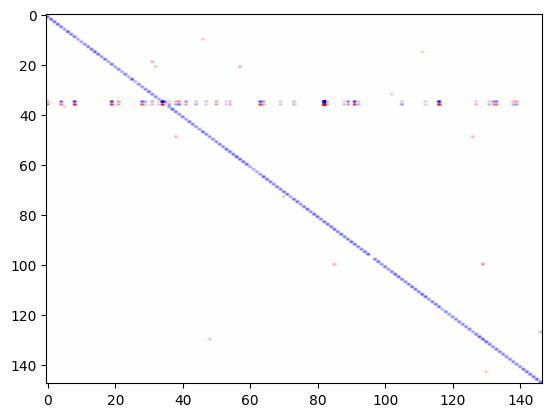

In [6]:
import matplotlib.pyplot as plt
clim = np.array([-1,1]) * 1
plt.imshow(Xi, aspect='auto', cmap='bwr', clim = clim)
#plt.imshow(Xi, cmap='bwr', clim = clim)

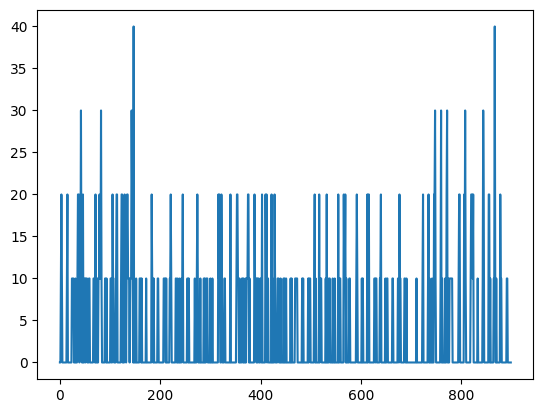

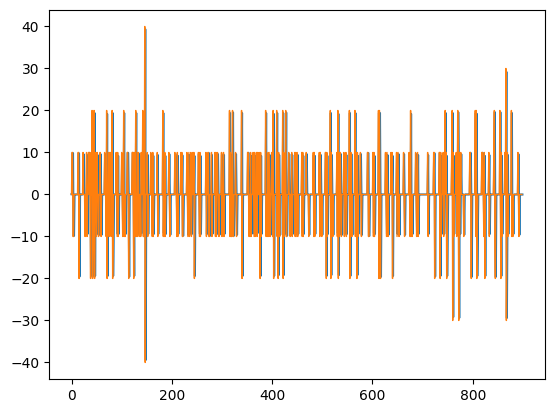

In [55]:
x = np.load(datadir / 'r.npy')
#dx = np.load(datadir / 'drdt.npy')
x = x[:900,:]
xsmall = x[:,65]
binwidth_s=.1

dx = sd.TVRegDiff(xsmall, 100, .01, scale='large', dx=binwidth_s, plotflag=False)
#dx2 = sd.TVRegDiff(xsmall, 100, 100, scale='small', dx=binwidth_s, plotflag=False)
dx3 = np.diff(xsmall)
plt.plot(xsmall)
plt.show()
plt.plot(dx/10)
#plt.plot(dx2,linewidth=1)
plt.plot(dx3,linewidth=1)